In [1]:
# Preamble
from astropy.table import Table, column
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

import sys
sys.path.append('../astro_codes/')

#### Load all the data

In [2]:
arc_data = Table.read('panoptes_project/arc_table_ml.fits')
samples = Table.read('../fits/sparcfire/sparcfire_samples.fits')
mass_data = Table.read('../fits/Simard+Mendel/mendel_masses.fits')
sfr_data = Table.read('../fits/SF_fits/sfrs.fits')
arc_level_data = Table.read('arc_level_data.fits')

In [3]:
good_arc_mask = arc_data['p_good_predicted'] == 1

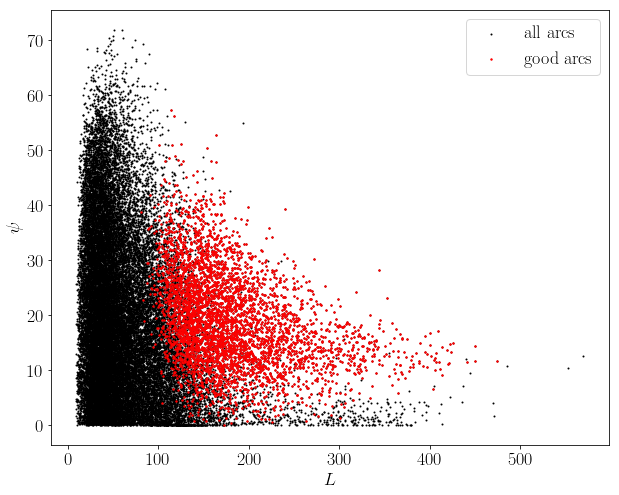

In [4]:
_ = plt.scatter(arc_data['arc_length'],arc_data['pitch_angle_absolute'],
                color='k',s=1,label='all arcs')

_ = plt.scatter(arc_data['arc_length'][good_arc_mask],
                arc_data['pitch_angle_absolute'][good_arc_mask],
                s=2,color='r',label='good arcs')

_ = plt.legend()
_ = plt.xlabel('$L$')
_ = plt.ylabel('$\psi$')

#### Investigate whether there are any differences in these parameters for differen galaxy subsamples

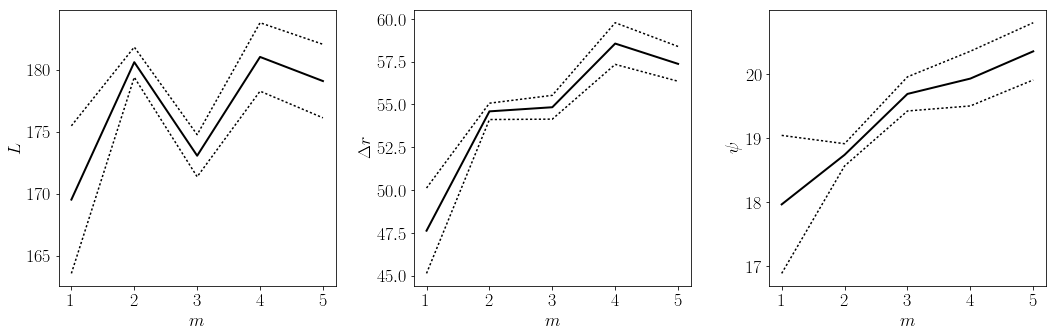

In [29]:
from xy_plots import x_vs_y

def plot_arc_level_data(x_data,y_data,x_column='m',y_columns=('arc_length','delta_r','pitch_angle_absolute')):
    N_y = len(y_columns)
    fig, axarr = plt.subplots(1,N_y,figsize=(N_y*5,5))
    x = x_data[x_column]
    for ax, y_column in zip(axarr,y_columns):
        y = y_data[y_column]
        xy = x_vs_y(x,y)
        xy = xy.discrete_vs_continuous_binned()
        xy.line_plot(ax,lw=2,color='k')
        xy.error_plot(ax,style='lined',linestyle='dotted',color='k')
    return fig, axarr
        
fig, axarr = plot_arc_level_data(arc_level_data,arc_data[good_arc_mask])

ylabels = ('$L$','$\Delta r$',r'$\psi$')

for ax, ylabel in zip(axarr,ylabels):
    ax.set_ylabel(ylabel)
    ax.set_xlabel('$m$')
    
fig.tight_layout()

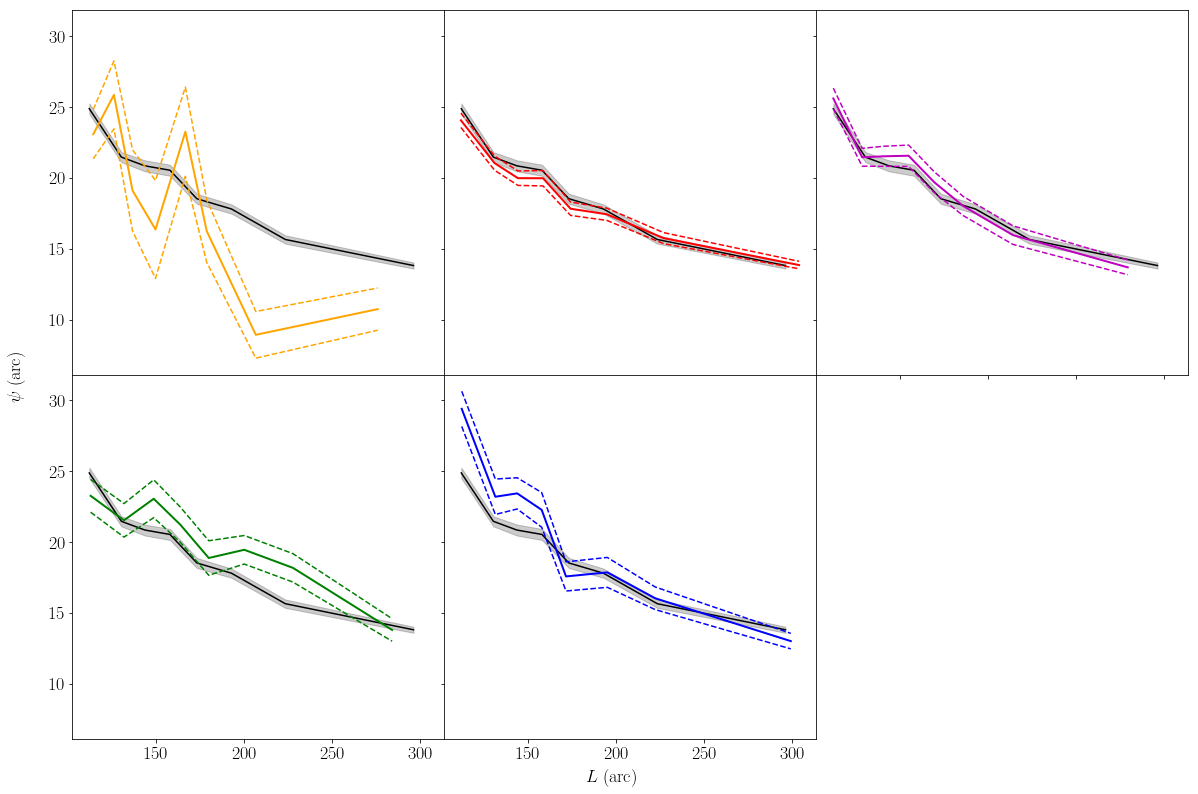

In [54]:
colors = ('orange','red','m','green','blue')

fig, axarr = plt.subplots(2,3,figsize=(20,13.4),
                          sharex=True,sharey=True)
axarr = axarr.ravel()
fig.delaxes(axarr[-1])
plt.subplots_adjust(wspace=0,hspace=0)

x_all = arc_data[good_arcs]['arc_length']
y_all = arc_data[good_arcs]['pitch_angle_absolute']
xy_all = x_vs_y(x_all,y_all).continuous_vs_continuous_binned(equal_N=True,bins=8)

for m, (ax, color) in enumerate(zip(axarr,colors)):
    
    #_ = ax.scatter(x_all,y_all,color='k',s=1)
    _ = xy_all.line_plot(ax,color='k')
    _ = xy_all.error_plot(ax,color='k',style='filled',alpha=0.2)
    
    in_m = arc_level_data['m'] == m+1
    x = arc_data[good_arcs][in_m]['arc_length']
    y = arc_data[good_arcs][in_m]['pitch_angle_absolute']
    xy = x_vs_y(x,y).continuous_vs_continuous_binned(equal_N=True,bins=8)
    _ = xy.line_plot(ax,color=color,lw=2)
    _ = xy.error_plot(ax,color=color,style='lined',linestyle='dashed')
    
_ = fig.text(0.5, 0.08, '$L$ (arc)', ha='center')
_ = fig.text(0.08, 0.5, '$\psi$ (arc)', va='center', rotation='vertical')
    

#### Now, make these plots in 4 bins:

1. 2 arms, unbarred
2. 2 arms, barred
3. 3+ arms, unbarred
4. 3+ arms, barred


In [57]:
arc_classes = np.ones(len(arc_level_data))*(-999)

barred = arc_level_data['p_bar'] > 0.5
unbarred = barred == False
m_2 = arc_level_data['m'] == 2
m_many = arc_level_data['m'] > 2

arc_classes[(unbarred) & (m_2)] = 1
arc_classes[(unbarred) & (m_many)] = 2
arc_classes[(barred) & (m_2)] = 3
arc_classes[(barred) & (m_many)] = 4

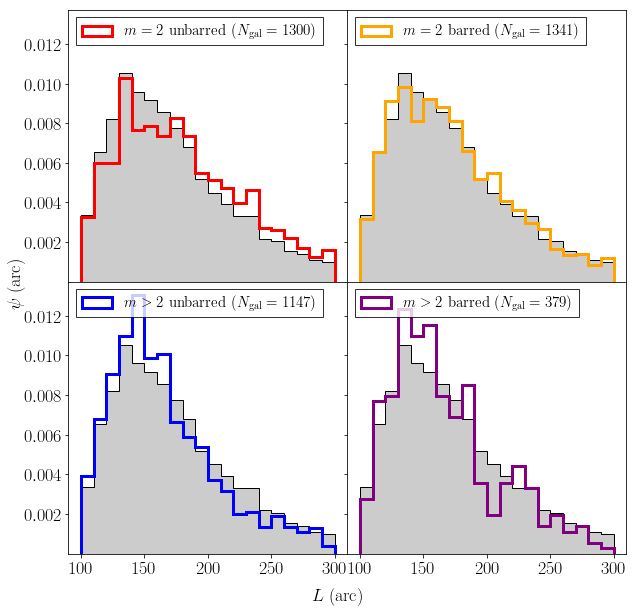

In [77]:
colors = ('red','orange','blue','purple')
classlabels = ('$m=2$ unbarred','$m=2$ barred',
               '$m>2$ unbarred','$m>2$ barred')

bins = np.linspace(100,300,21)

fig, axarr = plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
axarr = axarr.ravel()
fig.subplots_adjust(wspace=0,hspace=0)

x_all = arc_data[good_arcs]['arc_length']

for c, (ax,color,label) in enumerate(zip(axarr,colors,classlabels)):
    _ = ax.hist(x_all,bins,normed=True,label=None,
                histtype='stepfilled',color='k',alpha=0.2)
    _ = ax.hist(x_all,bins,normed=True,label=None,
                histtype='step',color='k')
    
    in_class = arc_classes == c+1
    xlabel = label + ' ($N_\mathrm{{gal}}={}$)'.format(in_class.sum())
    x_c = x_all[in_class]
    _ = ax.hist(x_c,bins,normed=True,label=xlabel,
                histtype='step',color=color,lw=3)
    _ = ax.legend(loc='upper left',fontsize=15,fancybox=False,edgecolor='k')

    
_ = fig.text(0.5, 0.06, '$L$ (arc)', ha='center')
_ = fig.text(0.04, 0.5, '$\psi$ (arc)', va='center', rotation='vertical')

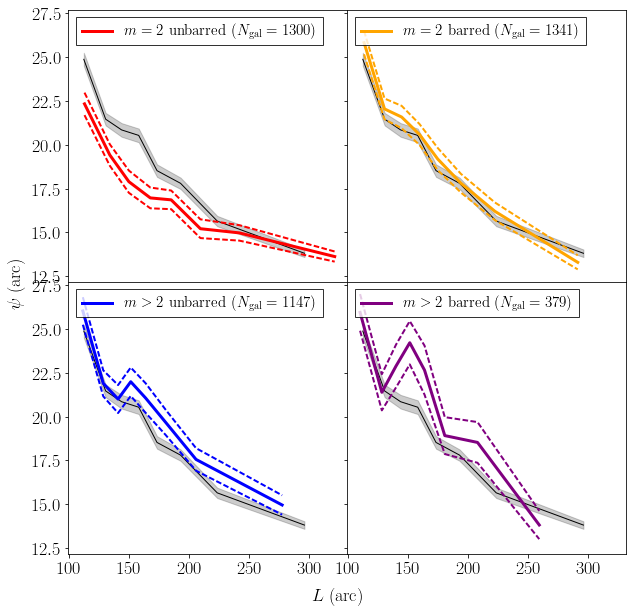

In [73]:
fig, axarr = plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
axarr = axarr.ravel()
fig.subplots_adjust(wspace=0,hspace=0)

x_all = arc_data[good_arcs]['arc_length']
y_all = arc_data[good_arcs]['pitch_angle_absolute']
xy_all = x_vs_y(x_all,y_all).continuous_vs_continuous_binned(equal_N=True,bins=8)

for c, (ax,color,label) in enumerate(zip(axarr,colors,classlabels)):
    xy_all.line_plot(ax,lw=1,color='k')
    xy_all.error_plot(ax,alpha=0.2,color='k')
    
    in_class = arc_classes == c+1
    xylabel = label + ' ($N_\mathrm{{gal}}={}$)'.format(in_class.sum())
    x_c = x_all[in_class]
    y_c = y_all[in_class]
    xy = x_vs_y(x_c,y_c).continuous_vs_continuous_binned(equal_N=True,bins=8)
    xy.line_plot(ax,lw=3,color=color,label=xylabel)
    xy.error_plot(ax,lw=2,linestyle='dashed',color=color,style='lined')
    _ = ax.legend(loc='upper left',fontsize=15,fancybox=False,edgecolor='k')
    
_ = fig.text(0.5, 0.06, '$L$ (arc)', ha='center')
_ = fig.text(0.04, 0.5, '$\psi$ (arc)', va='center', rotation='vertical')